In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [19]:
trained = pd.read_csv('titanic_train.csv')            
trained.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test = pd.read_csv('titanic_train.csv')
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
test.shape

(891, 12)

In [22]:
trained.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [23]:
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [24]:
trained.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [25]:
trained.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 48.8+ KB


In [26]:
trained.describe()  

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
trained.isnull().sum()    

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [28]:
trained['Age'].fillna(trained['Age'].mean(),inplace=True)
trained['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [29]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [30]:
trained.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [31]:
trained['Embarked'].replace('nan',np.nan,inplace=True)
trained['Embarked'].fillna(trained['Embarked'].mode()[0],inplace=True)

In [32]:
trained.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
test['Embarked'].replace('nan',np.nan,inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

In [34]:
trained.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
trained['Sex']=trained['Sex'].map({'male':0,'female':1})

trained['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [36]:
test['Sex']=test['Sex'].map({'male':0,'female':1})

test['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [37]:
trained['Embarked']=trained['Embarked'].map({'S':0,'C':1,'Q':2})

In [38]:
test['Embarked']=test['Embarked'].map({'S':0,'C':1,'Q':2})

In [39]:
trained.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [40]:
trained.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [41]:
test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [42]:
test['Fare'].replace(('nan',np.nan),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [43]:
test.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [44]:
trained['Embarked'].unique()

array([0, 1, 2], dtype=int64)

In [67]:
corr= trained.corr(method='pearson')
print(corr)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.331339  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.084153  0.114631  0.245489   
Age      -0.069809 -0.331339 -0.084153  1.000000 -0.232625 -0.179191   
SibSp    -0.035322  0.083081  0.114631 -0.232625  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.179191  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.091566  0.159651  0.216225   
Embarked  0.106811  0.045702  0.116569  0.007461 -0.059961 -0.078665   

              Fare  Embarked  
Survived  0.257307  0.106811  
Pclass   -0.549500  0.045702  
Sex       0.182333  0.116569  
Age       0.091566  0.007461  
SibSp     0.159651 -0.059961  
Parch     0.216225 -0.078665  
Fare      1.000000  0.062142  
Embarked  0.062142  1.000000  


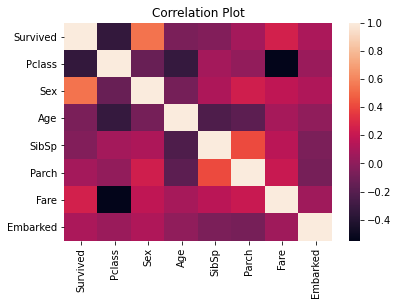

In [68]:
plt.title("Correlation Plot")
sns.heatmap(corr)
plt.show()

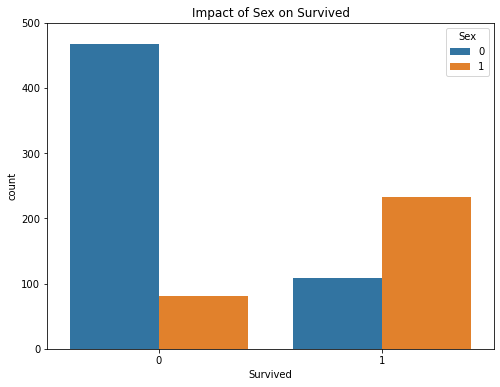

In [69]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=trained, hue='Sex')
ax.set_ylim(0,500)
plt.title("Impact of Sex on Survived")
plt.show()

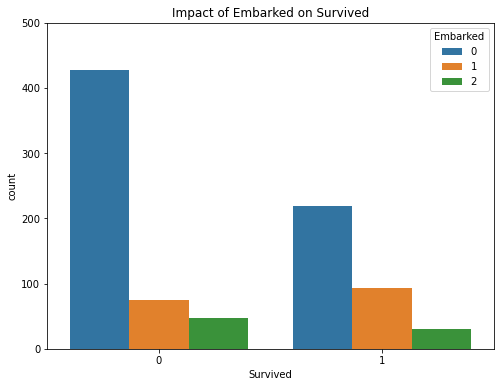

In [70]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=trained, hue='Embarked')
ax.set_ylim(0,500)
plt.title("Impact of Embarked on Survived")
plt.show()

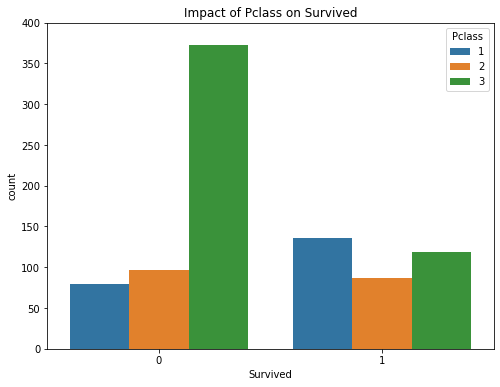

In [71]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=trained, hue='Pclass')
ax.set_ylim(0,400)
plt.title("Impact of Pclass on Survived")
plt.show()

In [45]:
x=trained.drop(['Survived'],axis=1)

y=trained['Survived']

In [46]:
#train_test_splitting of the dataset
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
#hyperparameter tuning of logistic regression
from sklearn.model_selection import GridSearchCV
param = {
         'penalty':['l1','l2'],
         'C':[0.001, 0.01, 0.1, 1, 10, 20,100, 1000]
}
lr= LogisticRegression(penalty='l1')
cv=GridSearchCV(log_reg,param,cv=5,n_jobs=-1)
cv.fit(x_train,y_train)
cv.predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [49]:
#best_parameters
print("Best CV params", cv.best_params_) 

Best CV params {'C': 0.1, 'penalty': 'l2'}


In [50]:
 #best_score
print("Best CV score", cv.best_score_)

Best CV score 0.8083941196274267


In [51]:
 #best_estimators
best_lr = cv.best_estimator_
best_lr

LogisticRegression(C=0.1)

In [52]:
prob = log_reg.predict_proba(x_train)
print("Maximum predicted probability",np.max(prob))

Maximum predicted probability 0.9918835314854377


# Support Vector Classifier

In [53]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(x_train,y_train)
y_preds=svm.predict(x_test)
svm.score(x_test,y_test)

0.7219730941704036

# SGDClassifier

In [54]:
from sklearn.linear_model import SGDClassifier
linear_classifier = SGDClassifier(random_state=0)


parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge','log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(x_train, y_train)


print("Test accuracy of best grid search hypers:", searcher.score(x_test, y_test))

Test accuracy of best grid search hypers: 0.7937219730941704


# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

pred = knn.predict(x_test)

In [56]:
#accuracy,confusion matrix and classification report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("accuracy score for trained data",accuracy_score(y_train,knn.predict(x_train)))
print("accuracy score is",accuracy_score(y_test,pred))

print("Confusion matrix",confusion_matrix(y_test,pred))

print("Report",classification_report(y_test,pred))

accuracy score for trained data 0.7964071856287425
accuracy score is 0.726457399103139
Confusion matrix [[112  27]
 [ 34  50]]
Report               precision    recall  f1-score   support

           0       0.77      0.81      0.79       139
           1       0.65      0.60      0.62        84

    accuracy                           0.73       223
   macro avg       0.71      0.70      0.70       223
weighted avg       0.72      0.73      0.72       223



# DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=123)

dt.fit(x_train,y_train)

y_preds = dt.predict(x_test)

In [58]:
print("accuracy score for trained data",accuracy_score(y_train,dt.predict(x_train)))
print("accuracy score is",accuracy_score(y_test,y_preds))

print("Confusion matrix",confusion_matrix(y_test,y_preds))

print("Report",classification_report(y_test,y_preds))

accuracy score for trained data 0.8682634730538922
accuracy score is 0.8026905829596412
Confusion matrix [[117  22]
 [ 22  62]]
Report               precision    recall  f1-score   support

           0       0.84      0.84      0.84       139
           1       0.74      0.74      0.74        84

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [59]:
#hyper parameter tuning
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10,13],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

decision = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1, verbose = 1)
decision.fit(x_train, y_train)
decision.best_score_

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2500 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 6500 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed:   26.4s finished


0.8143193805409045

# RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=10,min_samples_split=9)
rfc.fit(x_train,y_train)

predict=rfc.predict(x_test)

print(accuracy_score(y_test,predict))

0.8385650224215246


In [61]:
#accuracy score,classification report,confusion matrix
print("accuracy score for trained data",accuracy_score(y_train,rfc.predict(x_train)))
print("accuracy score is",accuracy_score(y_test,predict))

print("Confusion matrix",confusion_matrix(y_test,predict))

print("Report",classification_report(y_test,predict))

accuracy score for trained data 0.9041916167664671
accuracy score is 0.8385650224215246
Confusion matrix [[125  14]
 [ 22  62]]
Report               precision    recall  f1-score   support

           0       0.85      0.90      0.87       139
           1       0.82      0.74      0.78        84

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



We get best accuracy through RandomForestClassifier for the test set.

# Cross Validation

In [66]:
cvs=cross_val_score(LogisticRegression(),x,y,cv=5)
print("cross validation score of LogisticRegression model :",cvs.mean())
cvs=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("cross validation score of DecisionTreeClassifier model :",cvs.mean())
cvs=cross_val_score(SVC(),x,y,cv=5)
print("cross validation score of SVC model :",cvs.mean())
cvs=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("cross validation score of RandomForestClassifier model :",cvs.mean())

cross validation score of LogisticRegression model : 0.7946142740568704
cross validation score of DecisionTreeClassifier model : 0.7699956060510954
cross validation score of SVC model : 0.674615529470843
cross validation score of RandomForestClassifier model : 0.8103634423451134


# Hyperparameter Tuning for RandomForestClassifier

In [72]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [73]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10,
                                              min_samples_split=9),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [74]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 200}

In [75]:
Final_mod=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=5, criterion='gini')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.85650224215246


In [76]:
import joblib
joblib.dump(Final_mod,"TitanicProject.pkl")

['TitanicProject.pkl']